In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr
from scipy import stats


In [2]:
# Importo datos y limpio
df=pd.read_csv("./data/titanic.csv")
df.drop(columns=["deck","survived","pclass","embarked"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


In [3]:
df["family_members"]=df["sibsp"]+df["parch"]
df.drop(columns=["sibsp","parch"], inplace=True)
df.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1


In [4]:
# Añado las modas a los valores nulos
moda=df["embark_town"].mode()[0]
df["embark_town"].fillna(moda, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [5]:
# Calculo la media general para los valores nulos
media=df["age"].mean()
df["age"].fillna(round(media,1), inplace=True)
df.tail()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
886,male,27.0,13.00,Second,man,True,Southampton,no,True,0
887,female,19.0,30.00,First,woman,False,Southampton,yes,True,0
888,female,29.7,23.45,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.00,First,man,True,Cherbourg,yes,True,0
890,male,32.0,7.75,Third,man,True,Queenstown,no,True,0


In [6]:
def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts() # Values_counts() me da las frecuencias absolutas
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  # Si activo el argumento normalize me da las relativas en tanto por 1, el argumento porcentaje de la función me permite pasarlo a tanto por cien

    # Crear DataFrame con ambas frecuencias
    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df

In [7]:
frecuencias(df,"alive")


,Frecuencia Absoluta,Frecuencia Relativa
alive,,
no,549,61.616162
yes,342,38.383838


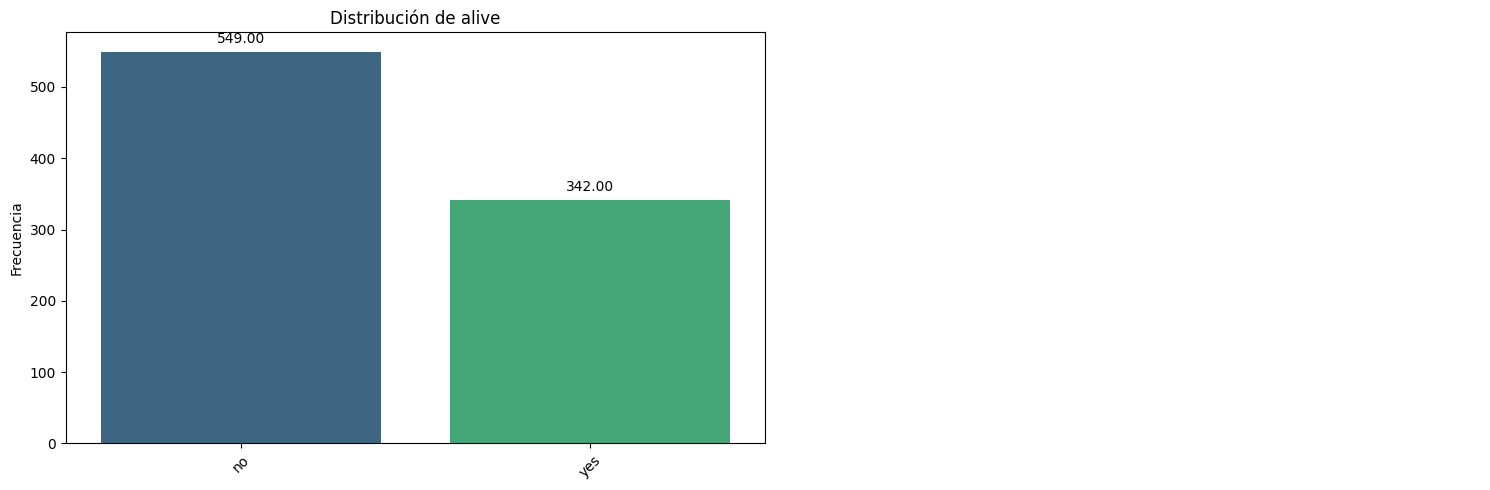

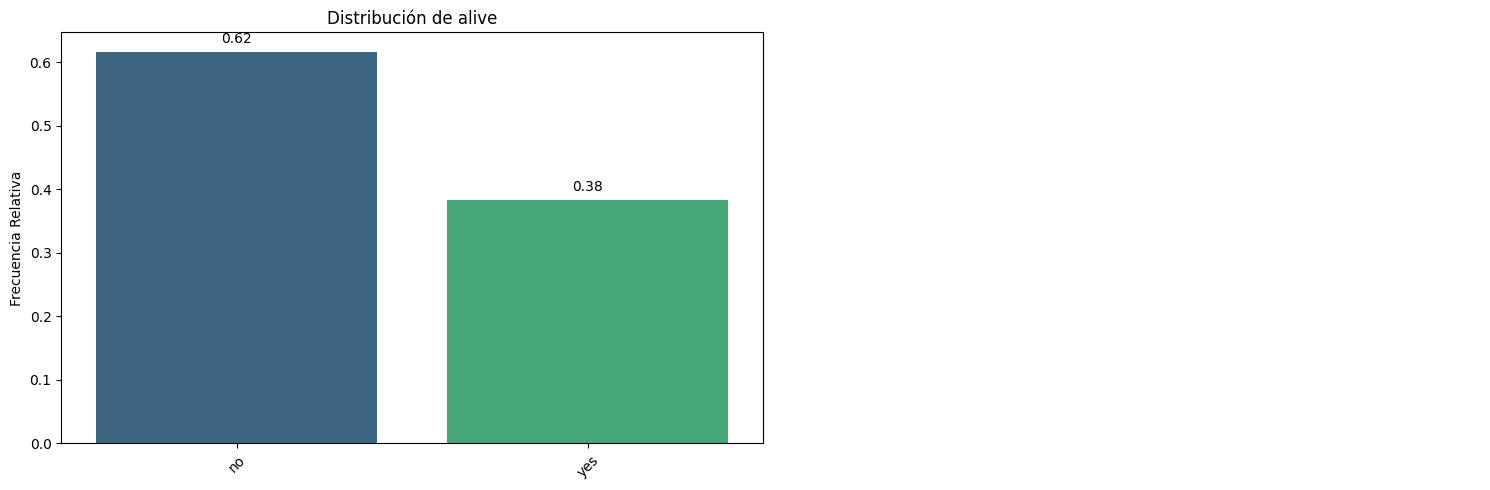

In [9]:
pinta_distribucion_categoricas(df,["alive"], mostrar_valores=True)
pinta_distribucion_categoricas(df,["alive"], relativa=True,mostrar_valores=True)

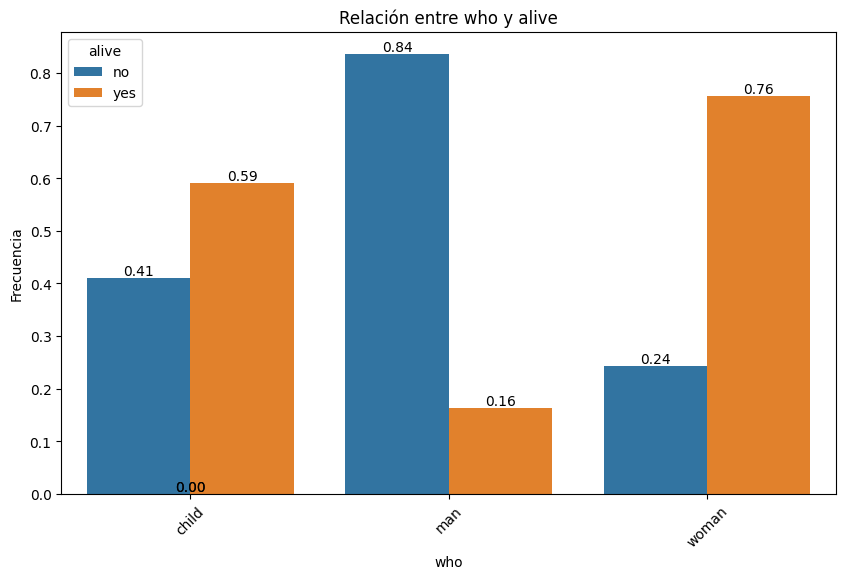

In [12]:
plot_categorical_relationship_fin(df,"who","alive",relative_freq=True,show_values=True)

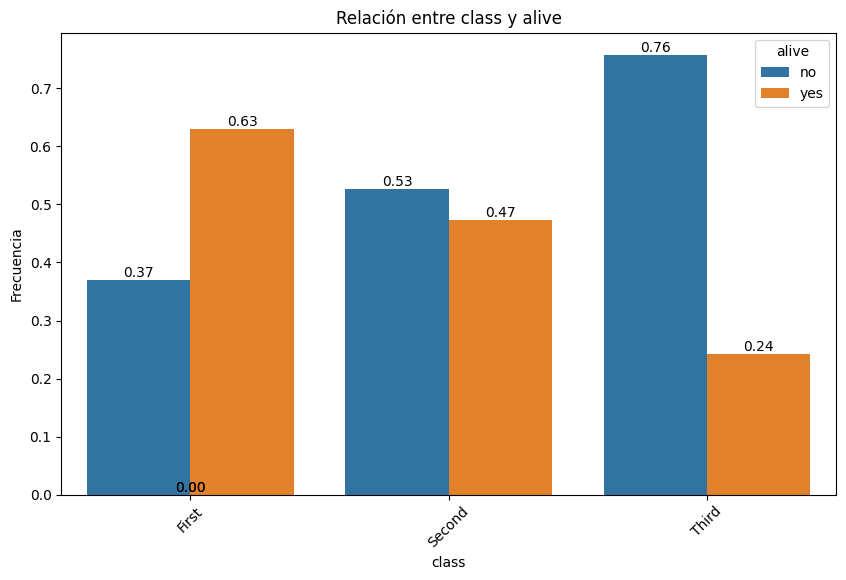

In [13]:
plot_categorical_relationship_fin(df,"class","alive",relative_freq=True,show_values=True)

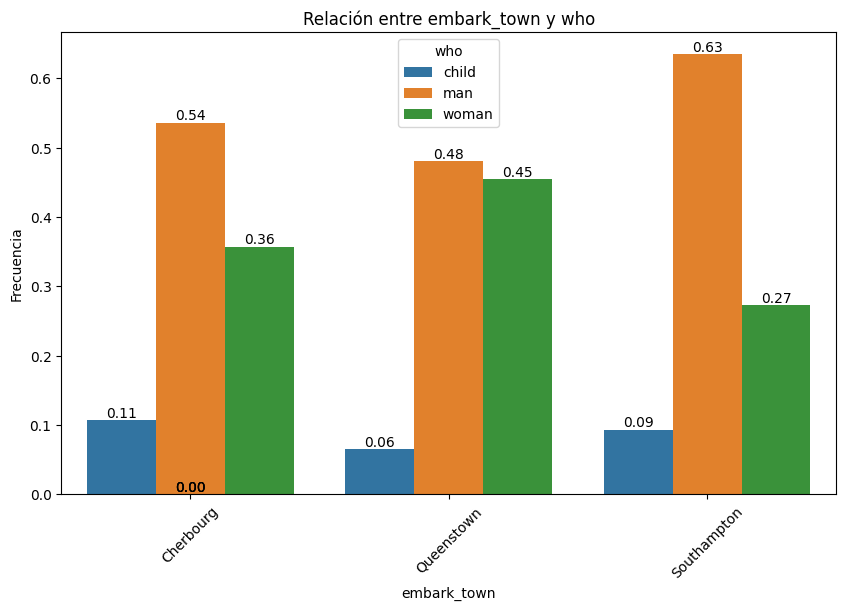

In [14]:
plot_categorical_relationship_fin(df, "embark_town","who", relative_freq= True, show_values= True)

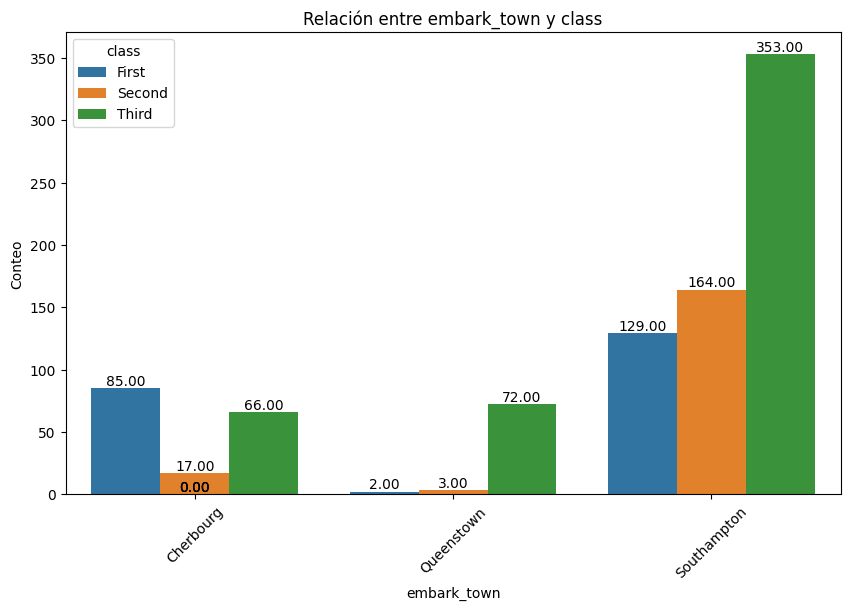

In [18]:
plot_categorical_relationship_fin(df, "embark_town","class", relative_freq= False, show_values= True)